# 构建简单的树

In [2]:
class TreeNode:
     def __init__(self, x):
         self.val = x       #数值
         self.left = None   #左右子节点地址
         self.right = None
 
a = TreeNode(1)
b = TreeNode(2)
c = TreeNode(3)
d = TreeNode(4)
e = TreeNode(5)
f = TreeNode(6)
g = TreeNode(7)
 
a.left = b
a.right = c
b.left = d
b.right = e
c.left = f
c.right = g

一颗基础的树：
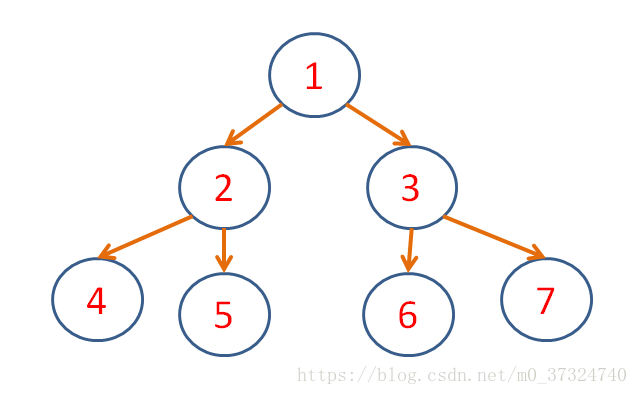

# 构建经典二叉树（分层遍历）
直接读取类名为地址   
三因素：节点（地址），节点数值，节点地址

In [1]:
import numpy as np
class Node():                           #定义节点类
    def __init__(self,data=''):
        self.data=data                  #节点数值
        self.left=None                  #左子节点
        self.right=None                 #右子节点
    def __str__(self):                  #隐性读取当前节点方法
        return str(self.data)           #返回当前节点值

class BuildTree():           
    def __init__(self,firstData):
        self.rootNode=Node(firstData)   #树的根节点,默认数据值为空
    def addNodes(self,NewDatas): #有序树增加节点,NewDatas为列表，前提要求数据已经排序
        Datalength=len(NewDatas)+1      #1为根节点
        depth=np.floor(np.log2(Datalength))+1  #求树的深度
        i=2
        stock=[self.rootNode]           #记录根节点地址
        while i<=depth:                 #处理每层树的节点
            currNN=2**(i-1)             #当前层最大节点数
            j=0
            while j<currNN:             #对当前层次的增加节点，直到加满
               curr=stock[0]            #获取当前节点地址
               j+=1
               if NewDatas:             #列表不为空时，弹出左边的元素
                   data=NewDatas.pop(0) #在列表里删除进入新节点的元素
               else:
                   break;               #最后一层节点必须考虑列表提供值不是满节点的情况
               Node1=Node(data)         #生成新节点
               print('入节点数%d'%(data))
               if j%2==0:               #j=1增加左节点，j=2增加右节点
                  curr.right=Node1      #当前节点增加右子节点
                  stock.pop(0)         #去掉最前面的节点地址
                  stock.append(Node1)  #最右右节点地址
               else:
                  curr.left=Node1      #当前节点增加左子节点
                  stock.append(Node1)  #最右左节点地址
            i+=1                       #树层加1
line1=[1,20,30,40,50,60,70,80]         #节点的数值
B1=BuildTree(line1[0])                 #建立带根节点的二叉树实例
B1.addNodes(line1[1:])                 #从第2节点开始构建树

入节点数20
入节点数30
入节点数40
入节点数50
入节点数60
入节点数70
入节点数80


# 先序遍历，递归遍历
注意递归：每层递归函数后面的程序会在嵌套子递归完成后再依次执行

In [2]:
def preoder(root):                     #先序遍历，递归遍历（根左右）
    p1=[]
    if root:                           #非空节点
        p1.append(root.data)           #每次储存当前节点数值[root.data]
        p1+= preoder(root.left)        #递归调用左节点（递归子层结束依次返回在p1中递+[1 20 40 80 50]）
        p1+= preoder(root.right)       #递归调用右节点[1 20 40 80 50 30 60 70]
    return p1                          #返回列表
L1=preoder(B1.rootNode)
print(L1)

[1, 20, 40, 80, 50, 30, 60, 70]


# 中序遍历，递归遍历

In [3]:
def middle(root):                     #中序遍历，递归遍历（左根右）
    p1=[]
    if root:                           #非空节点 
        p1+= middle(root.left)        #递归调用左节点
        p1.append(root.data)
        p1+= middle(root.right)       #递归调用右节点
    return p1                          #返回列表
L1=middle(B1.rootNode)
print(L1)

[80, 40, 20, 50, 1, 60, 30, 70]


# 后序遍历，递归遍历

In [4]:
def post(root):                     #后序遍历，递归遍历（左右根）
    p1=[]
    if root:                           #非空节点 
        p1+= post(root.left)        #递归调用左节点
        p1+= post(root.right)       #递归调用右节点
        p1.append(root.data)
    return p1                          #返回列表
L1=post(B1.rootNode)
print(L1)

[80, 40, 50, 20, 60, 70, 30, 1]


# 分层遍历，递归遍历

In [6]:
def level(root):                   #分层遍历，递归遍历
    q1=[root.data,root.left, root.right]#存放数据，左右节点地址
    p1=[]                               #记录节点的数值
    while q1:
        em= q1.pop(0)                   #从列表跳出一个元素
        if em:
            if isinstance(em,Node):       #判断元素是节点地址
                q1.append(em.data)        #把节点里的数值放入列表
                q1.append(em.left)        #把节点里的左子节点地址放入列表
                q1.append(em.right)       #把节点里的右子节点地址放入列表
            else:
                p1.append(em)            #把节点数据放入列表
    return p1
L1=level(B1.rootNode)
print(L1)

[1, 20, 30, 40, 50, 60, 70, 80]
